In [1]:
from analyse_logs import *

op_df = get_op_df(log_path)
op_df



opid: 101 req
opid: 102 req
opid: 103 req
opid: 104 req
opid: 105 req
opid: 106 req
opid: 104 reply
opid: 105 reply
opid: 106 reply
{101: {'opid': 101, 'method': 'discv5_registerTopic', 'reply_received': False, 'params': ['0x628b49d96dcde97a430dd4f597705899e09a968f793491e4b704cae33a40dc02', 101], 'start_time': 1665653953434}, 102: {'opid': 102, 'method': 'discv5_registerTopic', 'reply_received': False, 'params': ['0x628b49d96dcde97a430dd4f597705899e09a968f793491e4b704cae33a40dc02', 102], 'start_time': 1665653953530}, 103: {'opid': 103, 'method': 'discv5_registerTopic', 'reply_received': False, 'params': ['0x628b49d96dcde97a430dd4f597705899e09a968f793491e4b704cae33a40dc02', 103], 'start_time': 1665653953642}, 104: {'opid': 104, 'method': 'discv5_topicSearch', 'reply_received': True, 'params': ['0x628b49d96dcde97a430dd4f597705899e09a968f793491e4b704cae33a40dc02', 1, 104], 'start_time': 1665653963655, 'result': ['480f6ff3428c87081bc0720bd21ad93521610543de3a8e2d42866c1faaf69530'], 'end_tim

,opid,method,reply_received,params,start_time,result,end_time,time
0,101,discv5_registerTopic,False,[0x628b49d96dcde97a430dd4f597705899e09a968f793...,1665653953434,NaN,NaN,NaN
1,102,discv5_registerTopic,False,[0x628b49d96dcde97a430dd4f597705899e09a968f793...,1665653953530,NaN,NaN,NaN
2,103,discv5_registerTopic,False,[0x628b49d96dcde97a430dd4f597705899e09a968f793...,1665653953642,NaN,NaN,NaN
3,104,discv5_topicSearch,True,[0x628b49d96dcde97a430dd4f597705899e09a968f793...,1665653963655,[480f6ff3428c87081bc0720bd21ad93521610543de3a8...,1.665654e+12,22.0
4,105,discv5_topicSearch,True,[0x628b49d96dcde97a430dd4f597705899e09a968f793...,1665653963657,[277533ea2e875fa773c60be4db08413bfb2eefb01c390...,1.665654e+12,22.0
5,106,discv5_topicSearch,True,[0x628b49d96dcde97a430dd4f597705899e09a968f793...,1665653963658,[480f6ff3428c87081bc0720bd21ad93521610543de3a8...,1.665654e+12,21.0


<AxesSubplot:title={'center':'Operation returned'}, ylabel='reply_received'>

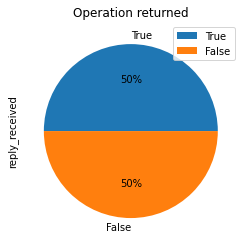

In [9]:
op_df['reply_received'].value_counts().plot(kind = 'pie', autopct='%1.0f%%', legend=True, title='Operation returned')

<AxesSubplot:xlabel='method', ylabel='time'>

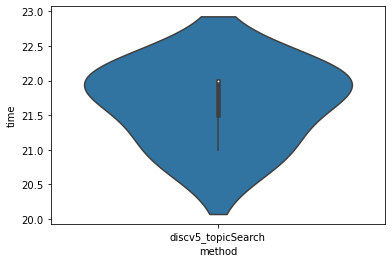

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots()
df = op_df[~op_df['time'].isna()]
df
sns.violinplot(x='method',y='time', data=df, ax = axes)
#axes.set_title('Day Ahead Market')

In [3]:
from analyse_logs import *

msg_df = get_msg_df(log_path)
msg_df

Reading node-9.log
Reading node-1.log
Reading node-7.log
Reading node-3.log
Reading node-6.log
Reading node-4.log
Reading node-8.log
Reading node-10.log
Reading node-5.log
Reading node-2.log


,node_id,peer_id,in_out,timestamp,msg_type,key,opid
0,9,1,out,2022-10-13 10:39:10.491216+01:00,FINDNODE/v5,NaN,NaN
1,9,1,in,2022-10-13 10:39:10.491289+01:00,WHOAREYOU/v5,NaN,NaN
2,9,1,out,2022-10-13 10:39:10.491649+01:00,FINDNODE/v5,NaN,NaN
3,9,1,in,2022-10-13 10:39:10.492038+01:00,NODES/v5,NaN,NaN
4,9,1,in,2022-10-13 10:39:10.492093+01:00,NODES/v5,NaN,NaN
...,...,...,...,...,...,...,...
4470,2,4,in,2022-10-13 10:39:45.783229+01:00,NODES/v5,NaN,NaN
4471,2,4,in,2022-10-13 10:39:45.783315+01:00,NODES/v5,NaN,NaN
4472,2,9,in,2022-10-13 10:39:45.783442+01:00,NODES/v5,NaN,NaN
4473,2,9,in,2022-10-13 10:39:45.783556+01:00,NODES/v5,NaN,NaN


<AxesSubplot:title={'center':'Msgs sent/received'}, ylabel='in_out'>

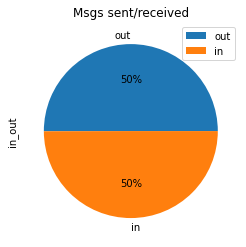

In [4]:
msg_df['in_out'].value_counts().plot(kind='pie', autopct='%1.0f%%', legend=True, title='Msgs sent/received')

In [5]:
for msg_type, group in msg_df[~msg_df['opid'].isna()].groupby('opid'):
    print(msg_type)
    print(group['msg_type'].value_counts())
    #print(group)

101.0
FINDNODE/v5    135
REGTOPIC/v5      9
Name: msg_type, dtype: int64
102.0
FINDNODE/v5    153
REGTOPIC/v5      9
Name: msg_type, dtype: int64
103.0
FINDNODE/v5    153
REGTOPIC/v5      9
Name: msg_type, dtype: int64
104.0
FINDNODE/v5      9
TOPICQUERY/v5    2
Name: msg_type, dtype: int64
105.0
FINDNODE/v5      9
TOPICQUERY/v5    2
Name: msg_type, dtype: int64
106.0
FINDNODE/v5      12
TOPICQUERY/v5     2
Name: msg_type, dtype: int64


Text(0, 0.5, '#Messages')

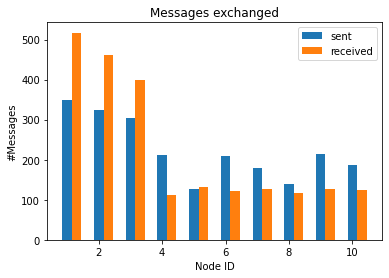

In [6]:
import matplotlib.pyplot as plt

sent = msg_df[msg_df['in_out'] == 'out']['node_id'].value_counts().to_dict()
sent = {int(k):int(v) for k,v in sent.items()} #convert IDs to int
received = msg_df[msg_df['in_out'] == 'in']['node_id'].value_counts().to_dict()
received = {int(k):int(v) for k,v in received.items()} #convert IDs to int

width =0.3
plt.bar(sent.keys(), sent.values(), width=width, label = 'sent')
plt.bar([x + width for x in received.keys()], received.values(), width=width, label = 'received')
plt.legend()
plt.title('Messages exchanged')
plt.xlabel('Node ID')
plt.ylabel('#Messages')

<AxesSubplot:>

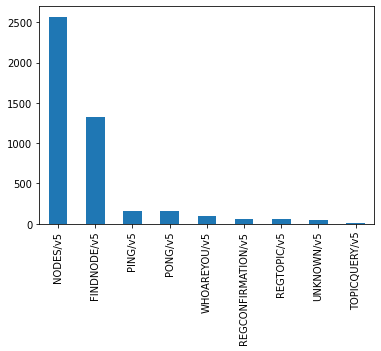

In [7]:
msg_df['msg_type'].value_counts().plot(kind='bar')

Text(0, 0.5, '#Messages')

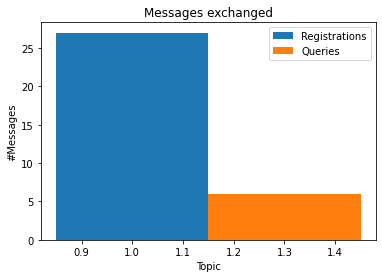

In [8]:
import numpy as np
import math
import hashlib

df2 = msg_df.dropna()
regs = df2[df2['msg_type'] == 'REGTOPIC/v5']['key'].value_counts().to_dict()
#regs = {int(k):int(v) for k,v in sent.items()} #convert IDs to int
queries = df2[df2['msg_type'] == 'TOPICQUERY/v5']['key'].value_counts().to_dict()
#received = {int(k):int(v) for k,v in received.items()} #convert IDs to int

width =0.3
plt.bar(regs.keys(), regs.values(), width=width, label = 'Registrations')
plt.bar([x + width for x in queries.keys()], queries.values(), width=width, label = 'Queries')
plt.legend()
plt.title('Messages exchanged')
plt.xlabel('Topic')
plt.ylabel('#Messages')

